## Tutorial 3. Exploratory data analysis : *the beauty of seaborn*


Created by Emanuel Flores-Bautista 2019  All content contained in this notebook is licensed under a [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/). The code is licensed under a [MIT license](https://opensource.org/licenses/MIT).

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

#Setting all the plots in the notebook
%matplotlib inline

#Make the figure format appear as svg
%config InlineBackend.figure_format = 'svg' 

A key aspect of data analysis is *finding a story within a data set*. Whether you are trying to analyze a dataset for scientific research or trying to develop a data-driven story for a grant blog post, or whatever the purpose it may be, exploratory data analysis is the best way to start getting an intuition behind the data you're working with. 

In this tutorial we will walk through with more depth some of the plots you can make in both Matplotlib and specially Seaborn. I will show you what I think are some great plotting tools you can have towards making meaningful exploratory data analysis. 

### Visualizing distributions

We're going to start by looking at different methods to visualize distributions. Let's start with the `plt.hist` function of matplotlib. In order to do that we're going to draw 1000 random samples from the Gaussian distribution, with a mean ( $\mu$ ) = 5 and a standard deviation ($\sigma$) = 2 . 

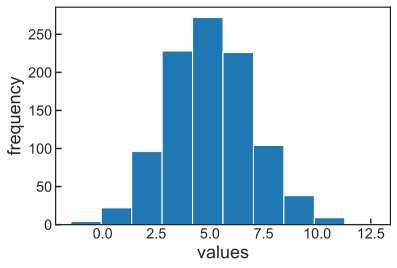

In [22]:
np.random.seed(42)
x = np.random.normal(loc = 5, scale = 2, size = 1000) #gaussian distro, mean = 5, std = 2


plt.hist(x)
plt.xlabel('values')
plt.ylabel('frequency');


We can easily control the plotting styles using the [sns.set_style](https://seaborn.pydata.org/tutorial/aesthetics.html) function of the Seaborn library. For example, we can plot behind a "darkgrid".

In [18]:
sns.set_style('darkgrid')

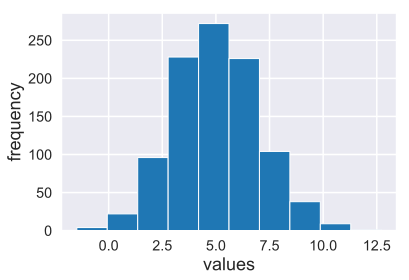

In [19]:
plt.hist(x)
plt.xlabel('values')
plt.ylabel('frequency');

Cool right? We can see that the font also changed!

I personally prefer to use a white background. I also made a simple function to set the plotting options in this workshop. Let's load the TCD_19 plotting options! 

In [133]:
import TCD19_utils as TCD_19

TCD_19.set_plotting_style_2()

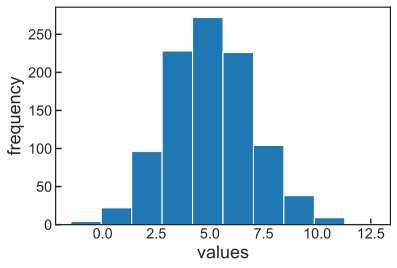

In [21]:
plt.hist(x)
plt.xlabel('values')
plt.ylabel('frequency');

Now, we have different fontsizes and other cool features to optimize visualization. 

In the previous tutorial I mentioned that violin plots make a kernel density estimation(KDE) of the distribution. If you want a deeper intuition about what a KDE means please refer to the great [Jake Van der Plas' Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html). KDE plots are a nice way to visualize continuous distributions. The Seaborn library has some nice implementations in both the `sns.distplot` and `sns.kdeplot` functions. [Here is a nice walkthrough](https://seaborn.pydata.org/tutorial/distributions.html) of the different options to visualize distributions in Seaborn. 

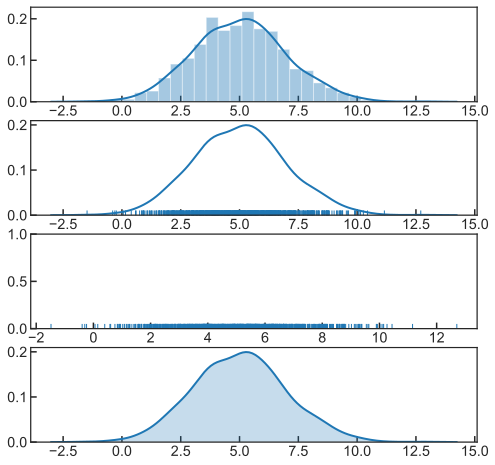

In [23]:
fig, axes = plt.subplots(4, 1, figsize = (8,8))

sns.distplot(x, ax = axes[0]);
sns.distplot(x, rug = True, hist = False, ax = axes[1])
sns.rugplot(x, ax = axes[2]);#Plot datapoints in an array as sticks on an axis.
sns.kdeplot(x, shade = True, ax= axes[3]);

Now, let's draw some samples from the Laplace distribution.

In [27]:
y = np.random.laplace (loc = 5, scale = 2, size = 1000)

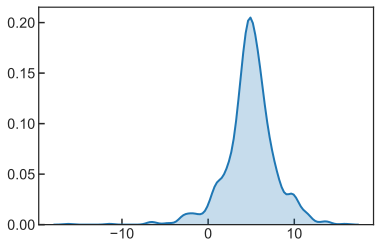

In [28]:
sns.kdeplot(y, shade = True)

Now let's concatenate both arrays and visualize their joint distribution. 

In [80]:
data = np.vstack((x, y))

In [81]:
data = data.T

We can also visualize 2-D distributions using the `sns.kdeplot` function. I personally love this visualization. In this plot, the color represents the joint probability density, that is the more points in a particular region, the more purple (in this case) the contour will appear. The `n_levels` parameter controls the number of contours the plot will show. 

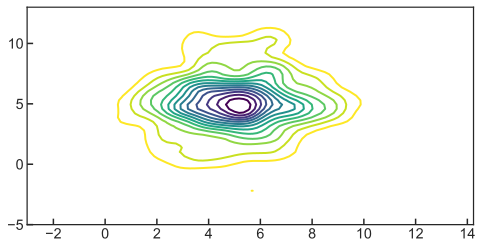

In [113]:
plt.figure(figsize = (8,4))

sns.kdeplot(x,y, n_levels= 15, cmap = 'viridis_r', shade = False)

plt.ylim(-5, 13);

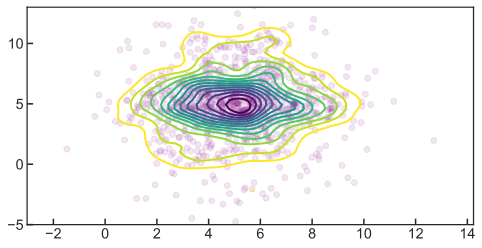

In [114]:
plt.figure(figsize = (8,4))

sns.kdeplot(x, y, n_levels= 15, cmap = 'viridis_r', shade = False)

plt.scatter(x, y, alpha = 0.1, c = 'purple')
plt.ylim(-5, 13);

We can also shade the 2-D KDE.

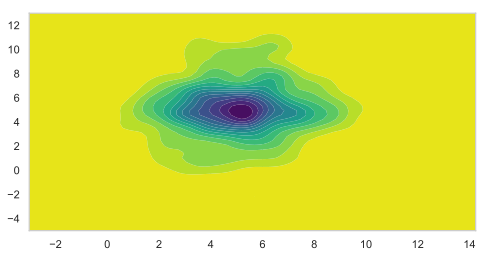

In [110]:
plt.figure(figsize = (8,4))

sns.kdeplot(x,y, n_levels= 15, cmap = 'viridis_r', shade = True)
plt.ylim(-5, 13);

To change the directions towards other types of data, let's look back at our tips dataset.

In [136]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [167]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


The `sns.FacetGrid` is a great figure to separate a dataset into different categories.

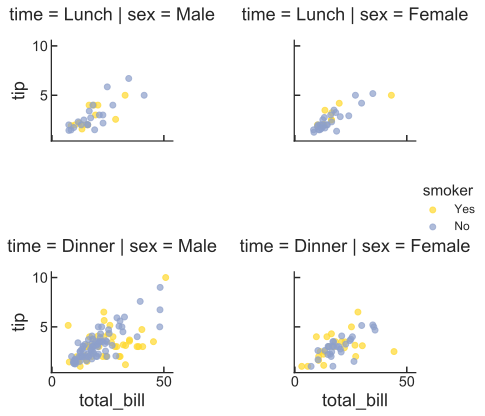

In [151]:
ax = sns.FacetGrid(tips, col="sex", row = 'time', hue="smoker", palette = 'Set2_r')
ax.map(plt.scatter, "total_bill", "tip", alpha=.7)
ax.add_legend()
plt.subplots_adjust(hspace=1.3, wspace=1);

Another very flexible grid framework is the [`sns.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html).

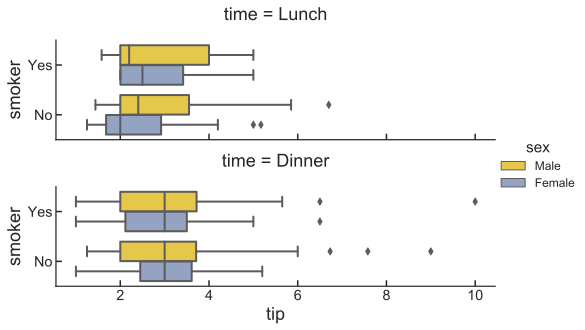

In [165]:
g = sns.catplot(x="tip", y="smoker",hue="sex", row="time",
                 data=tips,orient="h", height=2.4, aspect=3,
                palette="Set3", kind="box")

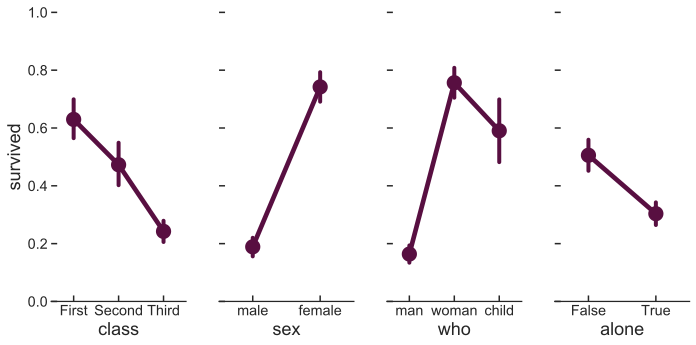

In [174]:
# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

To wrap up our distribution visualization ride, let's look at the [`boxenplot`](https://seaborn.pydata.org/examples/large_distributions.html) which is a mixture of a violin and a box plot.

In [176]:
palette = sns.cubehelix_palette(10, reverse = True)

In [118]:
diamonds = sns.load_dataset("diamonds")# use the diamond dataset
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


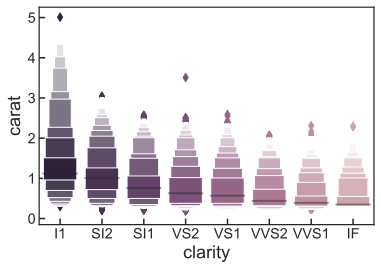

In [115]:
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              palette = palette, order=clarity_ranking,
              scale="linear", data=diamonds)

In [119]:
# Load the example planets dataset
planets = sns.load_dataset("planets")
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


### Please, don't use barplots and pie charts!
* Radar charts and treemaps

In [169]:
!{sys.executable} -m pip install squarify

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import squarify    

In [215]:
state_problems = pd.read_csv('../data/190220_SEPLAN-estructuras_problem.csv')

In [216]:
priority_problems = state_problems[state_problems.Prioridad == 1]

In [218]:
ejes = np.unique(priority_problems['Ejes sectoriales'].values)
n = len(ejes)
ejes

array(['Agua limpia', 'Ambiente', 'CTI', 'Ciudades y comun.',
       'Cult. indígena', 'Cultura', 'Deporte', 'Des. agrícola',
       'Des. pesquero', 'Educación', 'Emprendimiento',
       'Empresas locales ', 'Energía limpia', 'Gobierno', 'Hambre cero ',
       'Ig. de género', 'Inclusión', 'Infraestructura', 'Pobreza',
       'Salud', 'Seguridad', 'Trabajo', 'Turismo ', 'Vivienda'],
      dtype=object)

In [220]:
?sns.color_palette

In [222]:
palette= sns.color_palette('Greens', n_colors = n)[::-1]

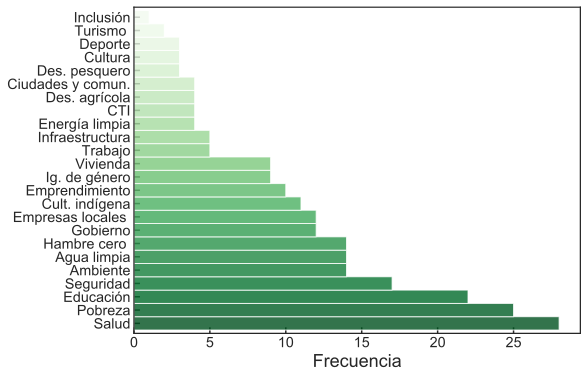

In [228]:
plt.figure(figsize = (8, 6))
priority_problems['Ejes sectoriales'].value_counts().plot(kind = 'barh', color = palette,width = 1, alpha = 0.8)

plt.xlabel('Frecuencia', fontsize = 18);

In [232]:
ejes_count = priority_problems.groupby('Ejes sectoriales').count()['Prioridad']

In [234]:
norm = mpl.colors.Normalize(vmin=min(ejes_count.values), vmax=max(ejes_count.values))
colors = [mpl.cm.Greens(norm(value)) for value in ejes_count.values]

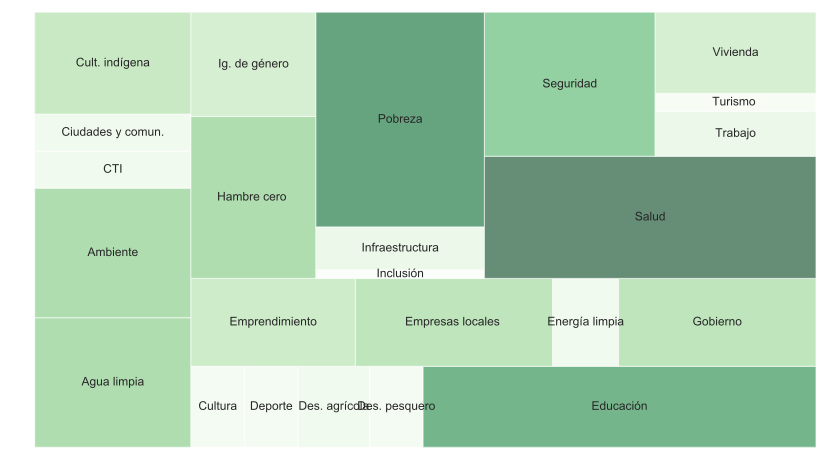

In [236]:
plt.figure(figsize=(14,8))
squarify.plot(label=ejes_count.keys(), sizes=ejes_count.values, color = colors, alpha=.6)

plt.axis('off');

In [237]:
ejes_count

Ejes sectoriales
Agua limpia          14
Ambiente             14
CTI                   4
Ciudades y comun.     4
Cult. indígena       11
Cultura               3
Deporte               3
Des. agrícola         4
Des. pesquero         3
Educación            22
Emprendimiento       10
Empresas locales     12
Energía limpia        4
Gobierno             12
Hambre cero          14
Ig. de género         9
Inclusión             1
Infraestructura       5
Pobreza              25
Salud                28
Seguridad            17
Trabajo               5
Turismo               2
Vivienda              9
Name: Prioridad, dtype: int64

In [ ]:
#radar chart

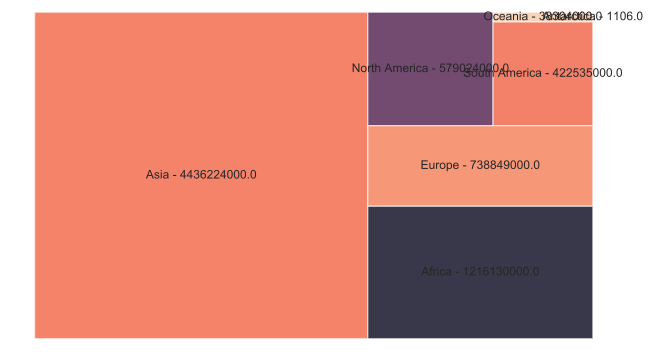

In [226]:
plt.figure(figsize = (10,6))

data =pd.read_html("https://en.wikipedia.org/wiki/List_of_continents_by_population",header=None,)
df=data[0]
df[2]=pd.to_numeric(df[2], errors='coerce')
population=df[2:][2]
continent= np.array(df[2:][1])+ " - " +population.astype("str")

squarify.plot(sizes=population, label=continent, alpha=.8 )
plt.axis('off')
plt.show()

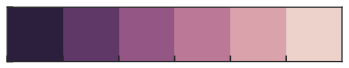

In [208]:
sns.palplot(palette)

### Scatter plots

Another pretty cool plot from seaborn is  the `sns.scatterplot`. We can map a colormap to a variable and dot size to another.  

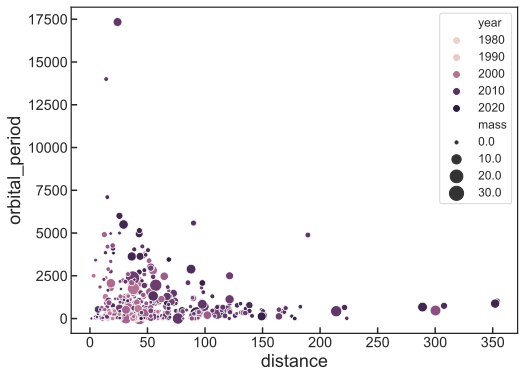

In [135]:
#Initialize a new palette 
cmap = sns.cubehelix_palette(10, as_cmap=True)

plt.figure(figsize = (8,6))

ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

In [173]:
dots.head()
dots = sns.load_dataset("dots")


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


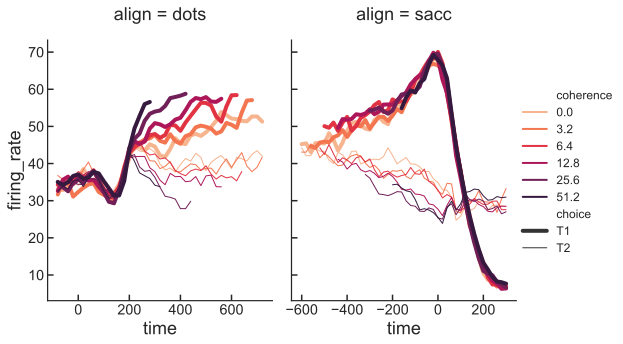

In [172]:
# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

In [188]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


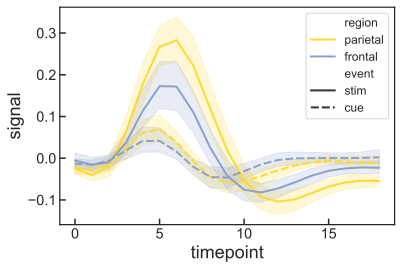

In [186]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri, palette= 'Set2_r')

In [189]:
flights = sns.load_dataset("flights")
flights.head()


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [190]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


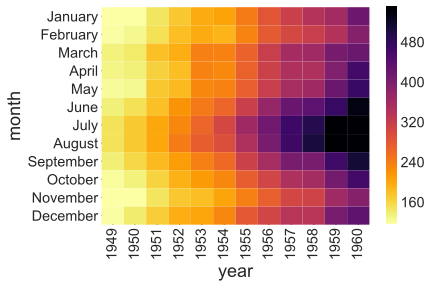

In [195]:
ax = sns.heatmap(flights, robust = True, cmap = 'inferno_r')

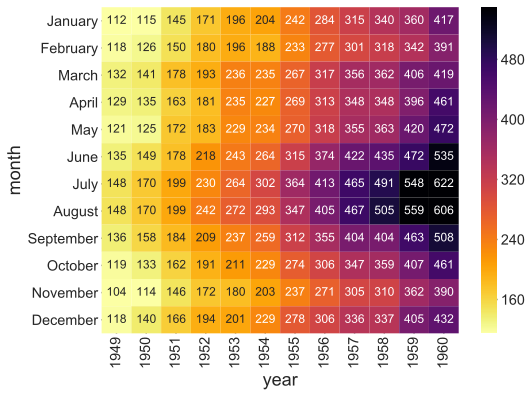

In [199]:
plt.figure(figsize = (8,6))
sns.heatmap(flights, annot=True, fmt="d",robust = True, cmap = 'inferno_r')

In [205]:
month_correlation_mat = flights.T.corr()

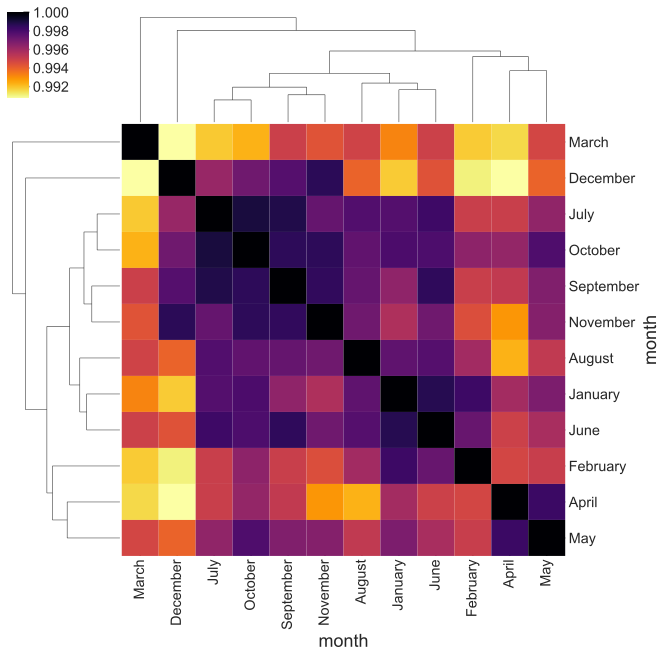

In [206]:
sns.clustermap(month_correlation_mat, cmap = 'inferno_r', robust = True)